<a href="https://colab.research.google.com/github/nickalden90/NBA-Shot-Data/blob/main/Copy_of_NBA_Shot_Charts_by_Decades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'nba-top-scorers-stats-and-shot-details-2000-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5576183%2F9221418%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240828%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240828T162317Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b47f0c37197af239355c08fb0ba5a277d75005d6ad0387b1df87285ef8c20483d69fa69672fbf487c7c4fde82c5044bdb3fb0fbb0657ad2054c20a4837cae4d123853f1f638486a1d87b3d465d9514e4a2f7b2d88ffc3991fbacda5d1ccfcd550938489a2f946d0b90ec28cfa337d772c3703bf20de27cbc7abbbb610ffa68eed38f34ef0de935c5e0b1902132d35242ae5b8ff7e6baa3653b12bf8e48b34b0b7b74f42c495b038b5c830632b336e58d717a9d1dba8a8a0f03bc0c4500122d6d303ba9370c501f0e1b815fae7f8a37491060099b18ef4846f3c06ab3bd58a00c106ad3afdc7d0d45d8f6dbd773af36eeaac35b1e7e4f50ae6cccb9de2546e88'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2731965 bytes downloaded
Downloaded and uncompressed: nba-top-scorers-stats-and-shot-details-2000-2024
Data source import complete.


In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
leaders = pd.read_csv('/kaggle/input/nba-top-scorers-stats-and-shot-details-2000-2024/leaders.csv')
shots2000s = pd.read_csv('/kaggle/input/nba-top-scorers-stats-and-shot-details-2000-2024/shots2000s.csv')
shots2010s = pd.read_csv('/kaggle/input/nba-top-scorers-stats-and-shot-details-2000-2024/shots2010s.csv')
shots2020s = pd.read_csv('/kaggle/input/nba-top-scorers-stats-and-shot-details-2000-2024/shots2020s.csv')


In [ ]:
court_img = mpimg.imread('/kaggle/input/nba-top-scorers-stats-and-shot-details-2000-2024/court_outline.png')

In [ ]:
seasons00s = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',]
shots00s = shots2000s.loc[shots2000s['season'].isin(seasons00s)]

seasons05s = ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10',]
shots05s = shots2000s.loc[shots2000s['season'].isin(seasons05s)]

seasons10s = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15',]
shots10s = shots2010s.loc[shots2010s['season'].isin(seasons10s)]

seasons15s = ['2015-16', '2016-17', '2017-18', '2018-19', '2019-20',]
shots15s = shots2010s.loc[shots2010s['season'].isin(seasons15s)]

seasons20s = ['2020-21', '2021-22', '2022-23', '2023-24', '2024-25',]
shots20s = shots2020s.loc[shots2020s['season'].isin(seasons20s)]

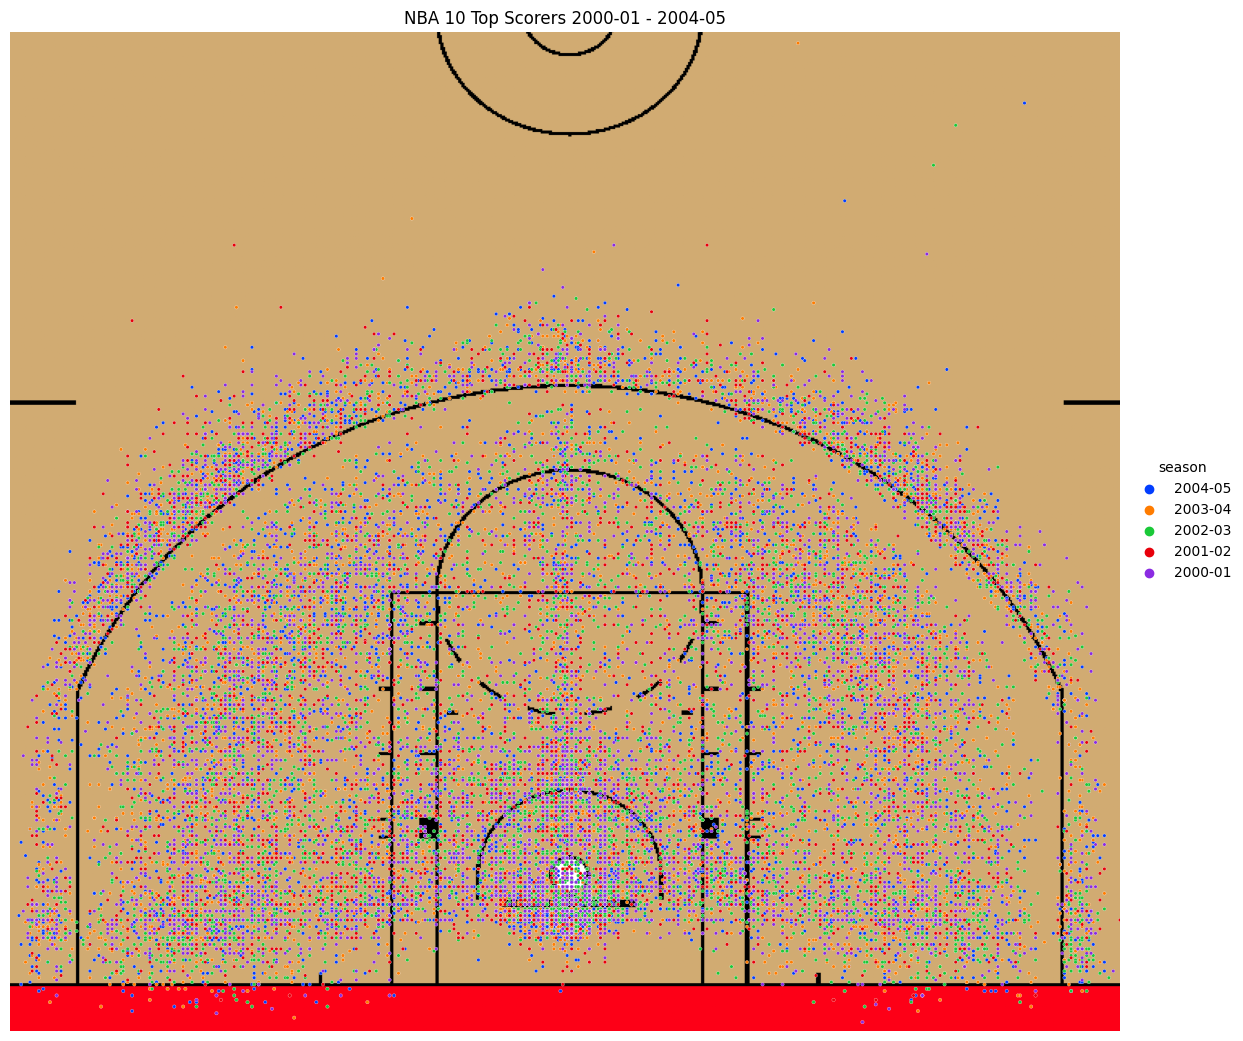

In [ ]:
g = sns.relplot(data=shots00s, x='LOC_X', y='LOC_Y', kind='scatter', s=6, height=12, hue='season', palette='bright')
g.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410])
plt.title('NBA 10 Top Scorers 2000-01 - 2004-05');
plt.savefig('shots00s.png')

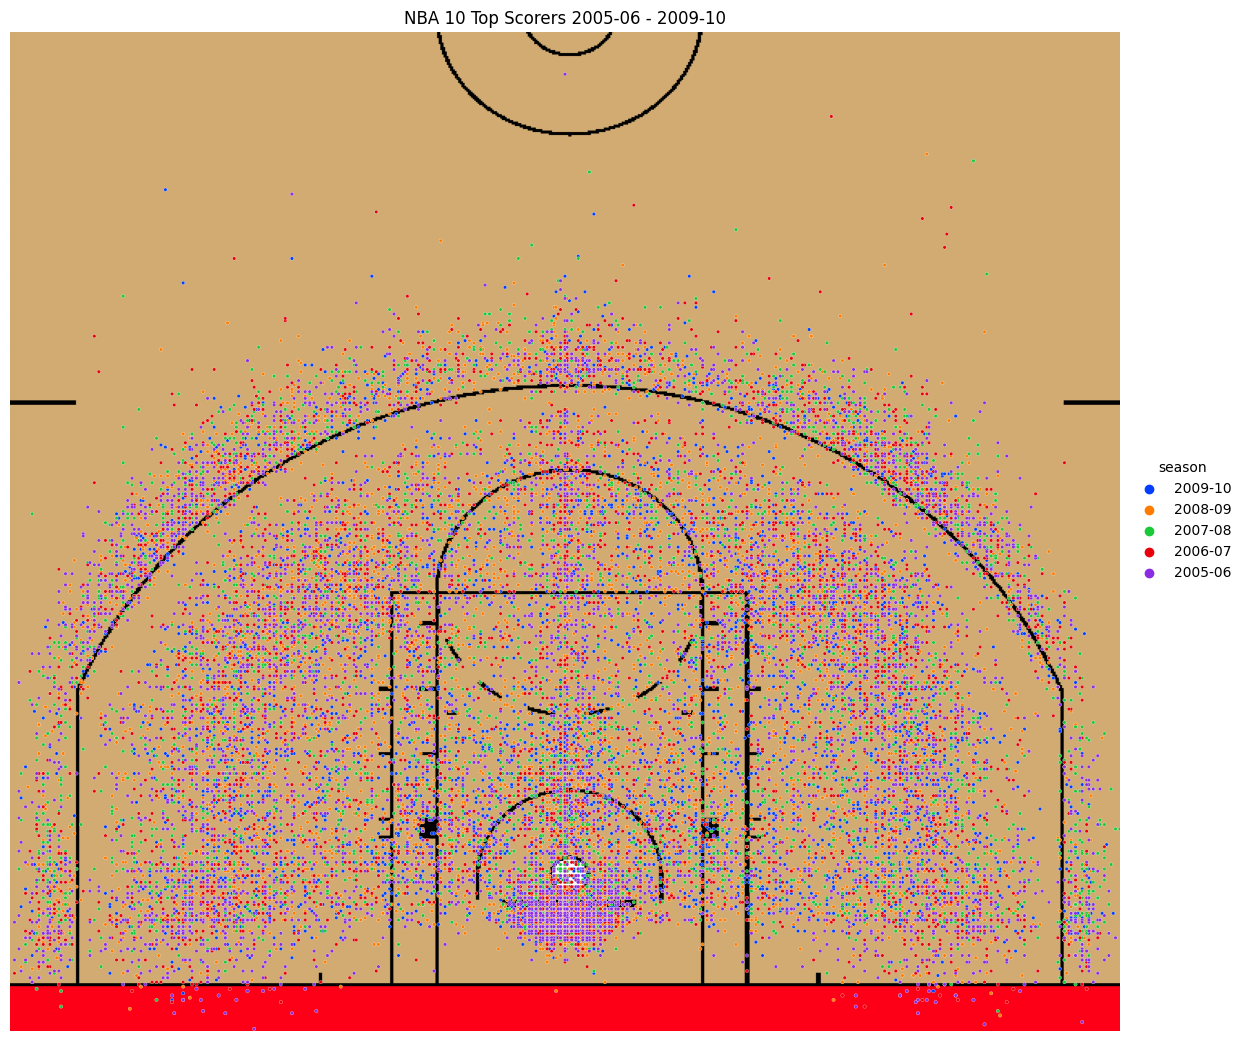

In [ ]:
g = sns.relplot(data=shots05s, x='LOC_X', y='LOC_Y', kind='scatter', s=6, height=12, hue='season', palette='bright')
g.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410])
plt.title('NBA 10 Top Scorers 2005-06 - 2009-10');
plt.savefig('shots2005s.png')

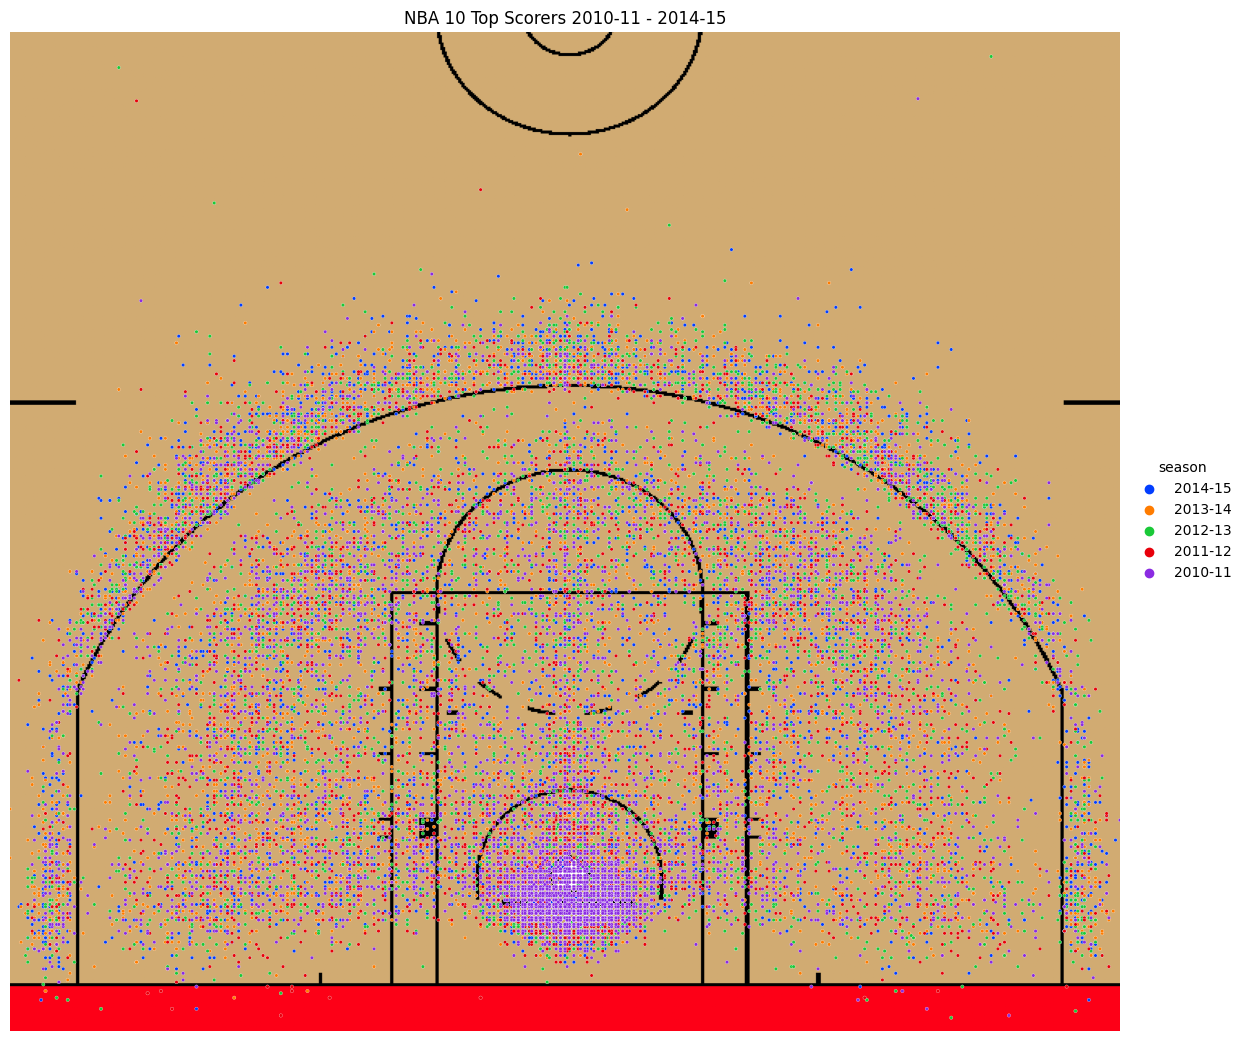

In [ ]:
g = sns.relplot(data=shots10s, x='LOC_X', y='LOC_Y', kind='scatter', s=6, height=12, hue='season', palette='bright')
g.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410])
plt.title('NBA 10 Top Scorers 2010-11 - 2014-15');
plt.savefig('shots2010s.png')

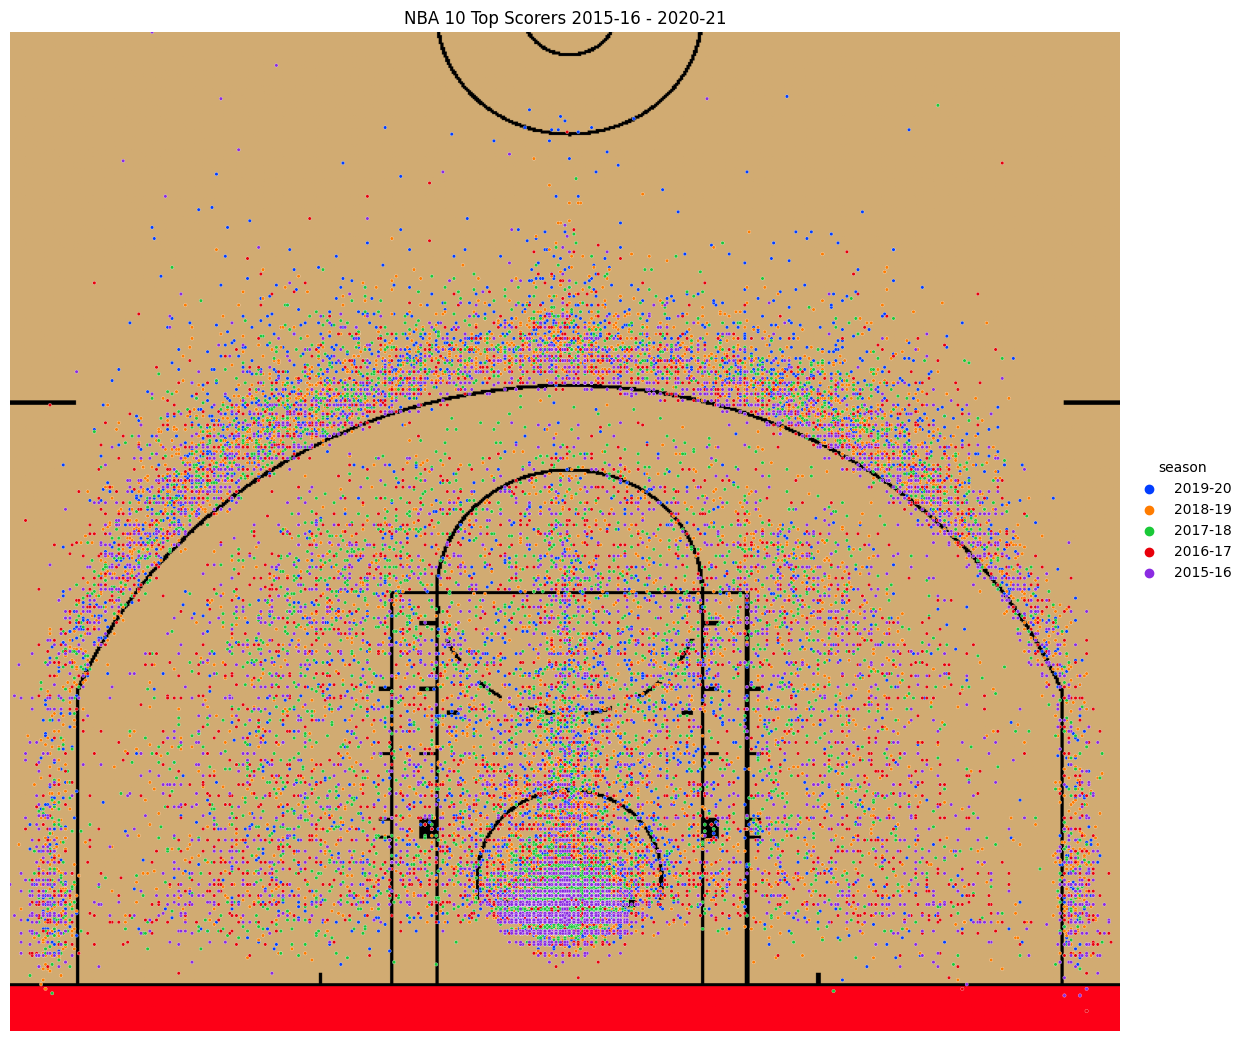

In [ ]:
g = sns.relplot(data=shots15s, x='LOC_X', y='LOC_Y', kind='scatter', s=6, height=12, hue='season', palette='bright')
g.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410])
plt.title('NBA 10 Top Scorers 2015-16 - 2020-21');
plt.savefig('shots2015s.png')

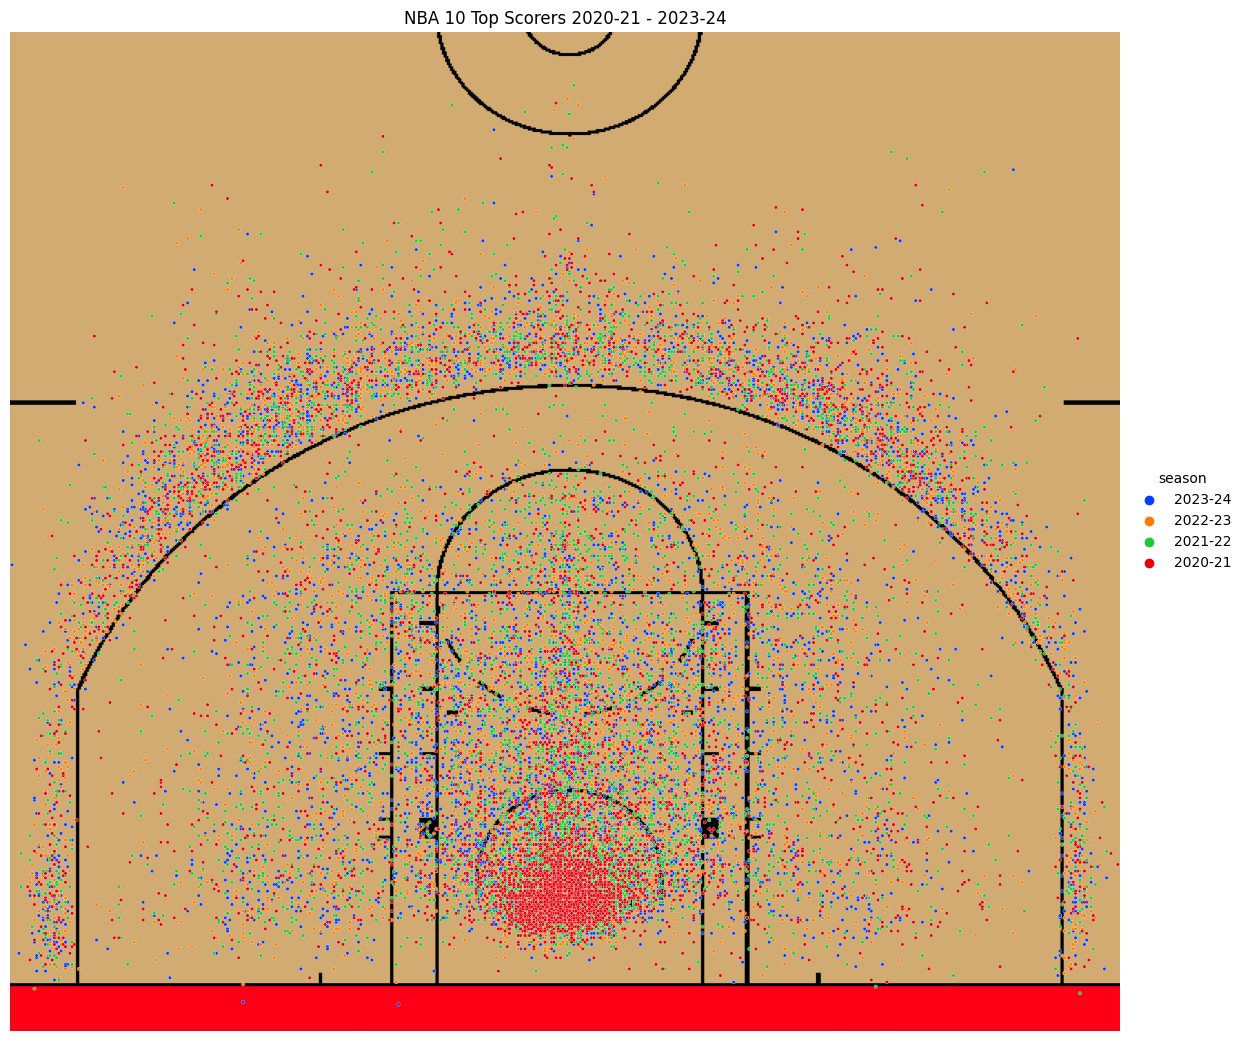

In [ ]:
g = sns.relplot(data=shots20s, x='LOC_X', y='LOC_Y', kind='scatter', s=6, height=12, hue='season', palette='bright')
g.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410])
plt.title('NBA 10 Top Scorers 2020-21 - 2023-24');
plt.savefig('shots2020s.png')

In [ ]:
shots = pd.concat([shots2000s, shots2010s, shots2020s])
shots.sort_values(by='GAME_DATE', inplace=True)

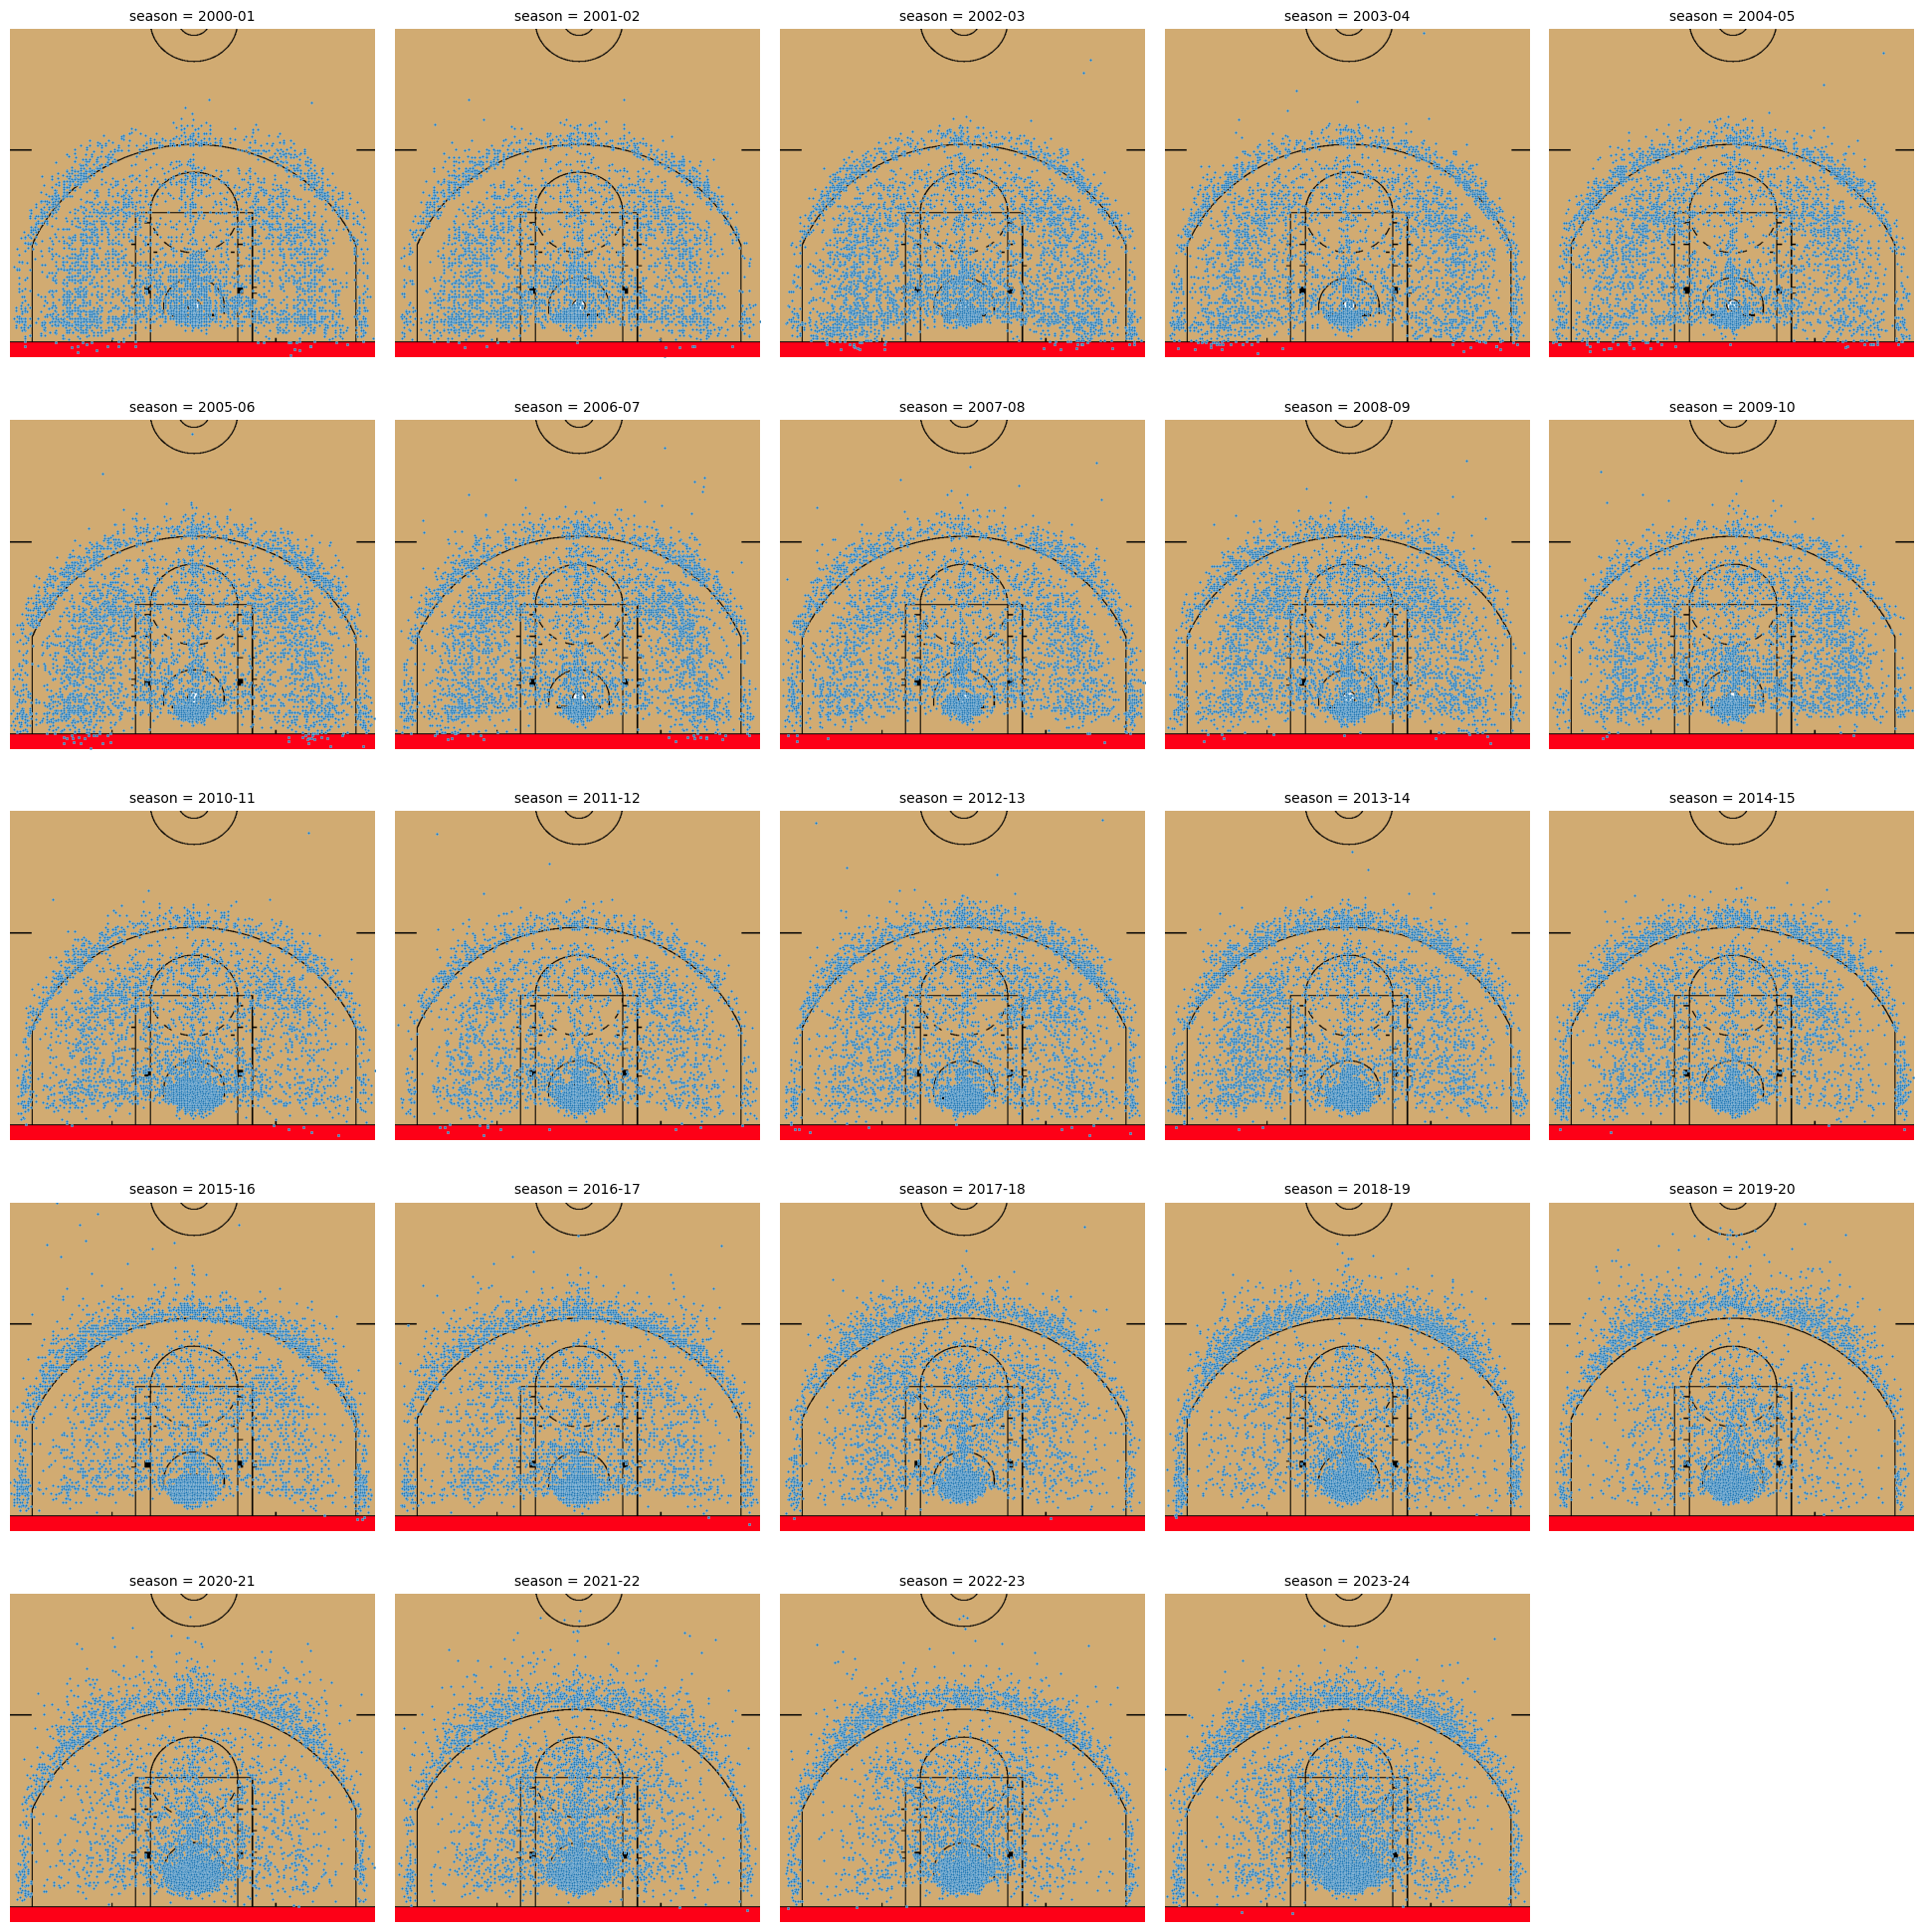

In [ ]:
h = sns.relplot(data=shots, x='LOC_X', y='LOC_Y', kind='scatter', s=4, height=4, col_wrap=5, col='season')
h.set(xlim=(-250, 250), ylim=(-50, 400), yticks=[], xticks=[],xlabel=None, ylabel=None)
h.despine(left=True, bottom=True)
for ax in h.fig.axes:
    ax.imshow(court_img, extent=[-380, 380, -150, 410]);
plt.savefig('shot_chart_by_season.png')